# Regresión Logística
En el presente estudio, se realiza el análisis y modelado de un conjunto de datos relacionado con el uso de tarjetas de crédito. El objetivo es desarrollar un modelo de clasificación que permita predecir la categoría de las observaciones basándose en las variables predictoras disponibles. Para lograrlo, se ha utilizado la Regresión Logística, un método estadístico ampliamente conocido y utilizado en problemas de clasificación binaria.

In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from pandas._libs.tslibs import delta_to_nanoseconds

In [ ]:
# Datos
# ==============================================================================
# Cargamos el conjunto de datos desde un archivo CSV.
datos = pd.read_csv('/content/tarjetas.csv', header=0, delimiter=";", decimal=",")

# Eliminar filas con valores nulos
datos.dropna(inplace=True)

#Excluimos de la base las columnas de variables categoricas
datos = datos.drop("id", axis=1)



In [ ]:
#Mantenemos solo dos variables predictores y una de clase
datos2 = datos.iloc[ :, [4,8,29]]
datos2.describe()

,V5,V9,Class
count,2.240600e+04,2.240600e+04,22406.000000
mean,1.589390e+15,1.680821e+15,0.555432
std,1.705632e+16,1.552763e+16,0.496929
min,-7.542950e+16,-6.407030e+16,0.000000
25%,-7.319422e+15,-7.537172e+15,0.000000
50%,1.679355e+15,1.634490e+15,1.000000
75%,9.526712e+15,1.056660e+16,1.000000
max,7.957660e+16,7.584250e+16,1.000000


In [ ]:
print(datos2.groupby('Class').size())

Class
0     9961
1    12445
dtype: int64


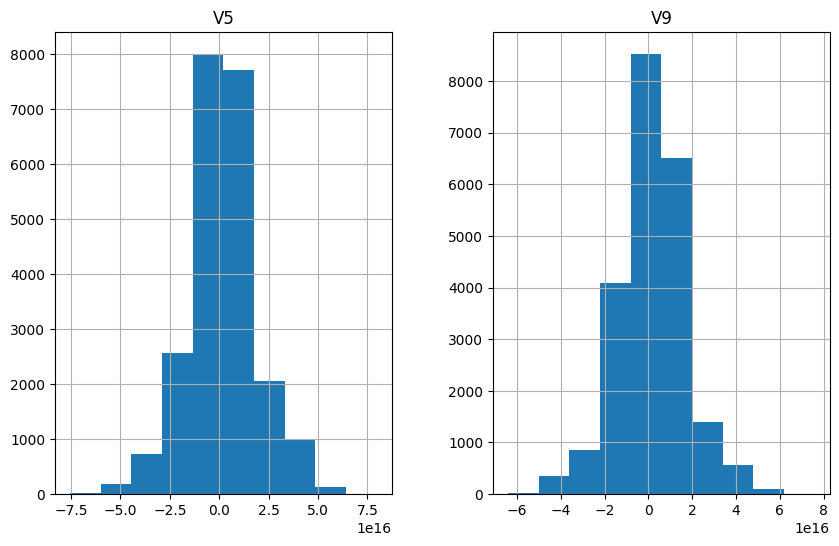

In [ ]:
datos2.drop(['Class'], axis=1).hist(figsize=(10, 6))
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


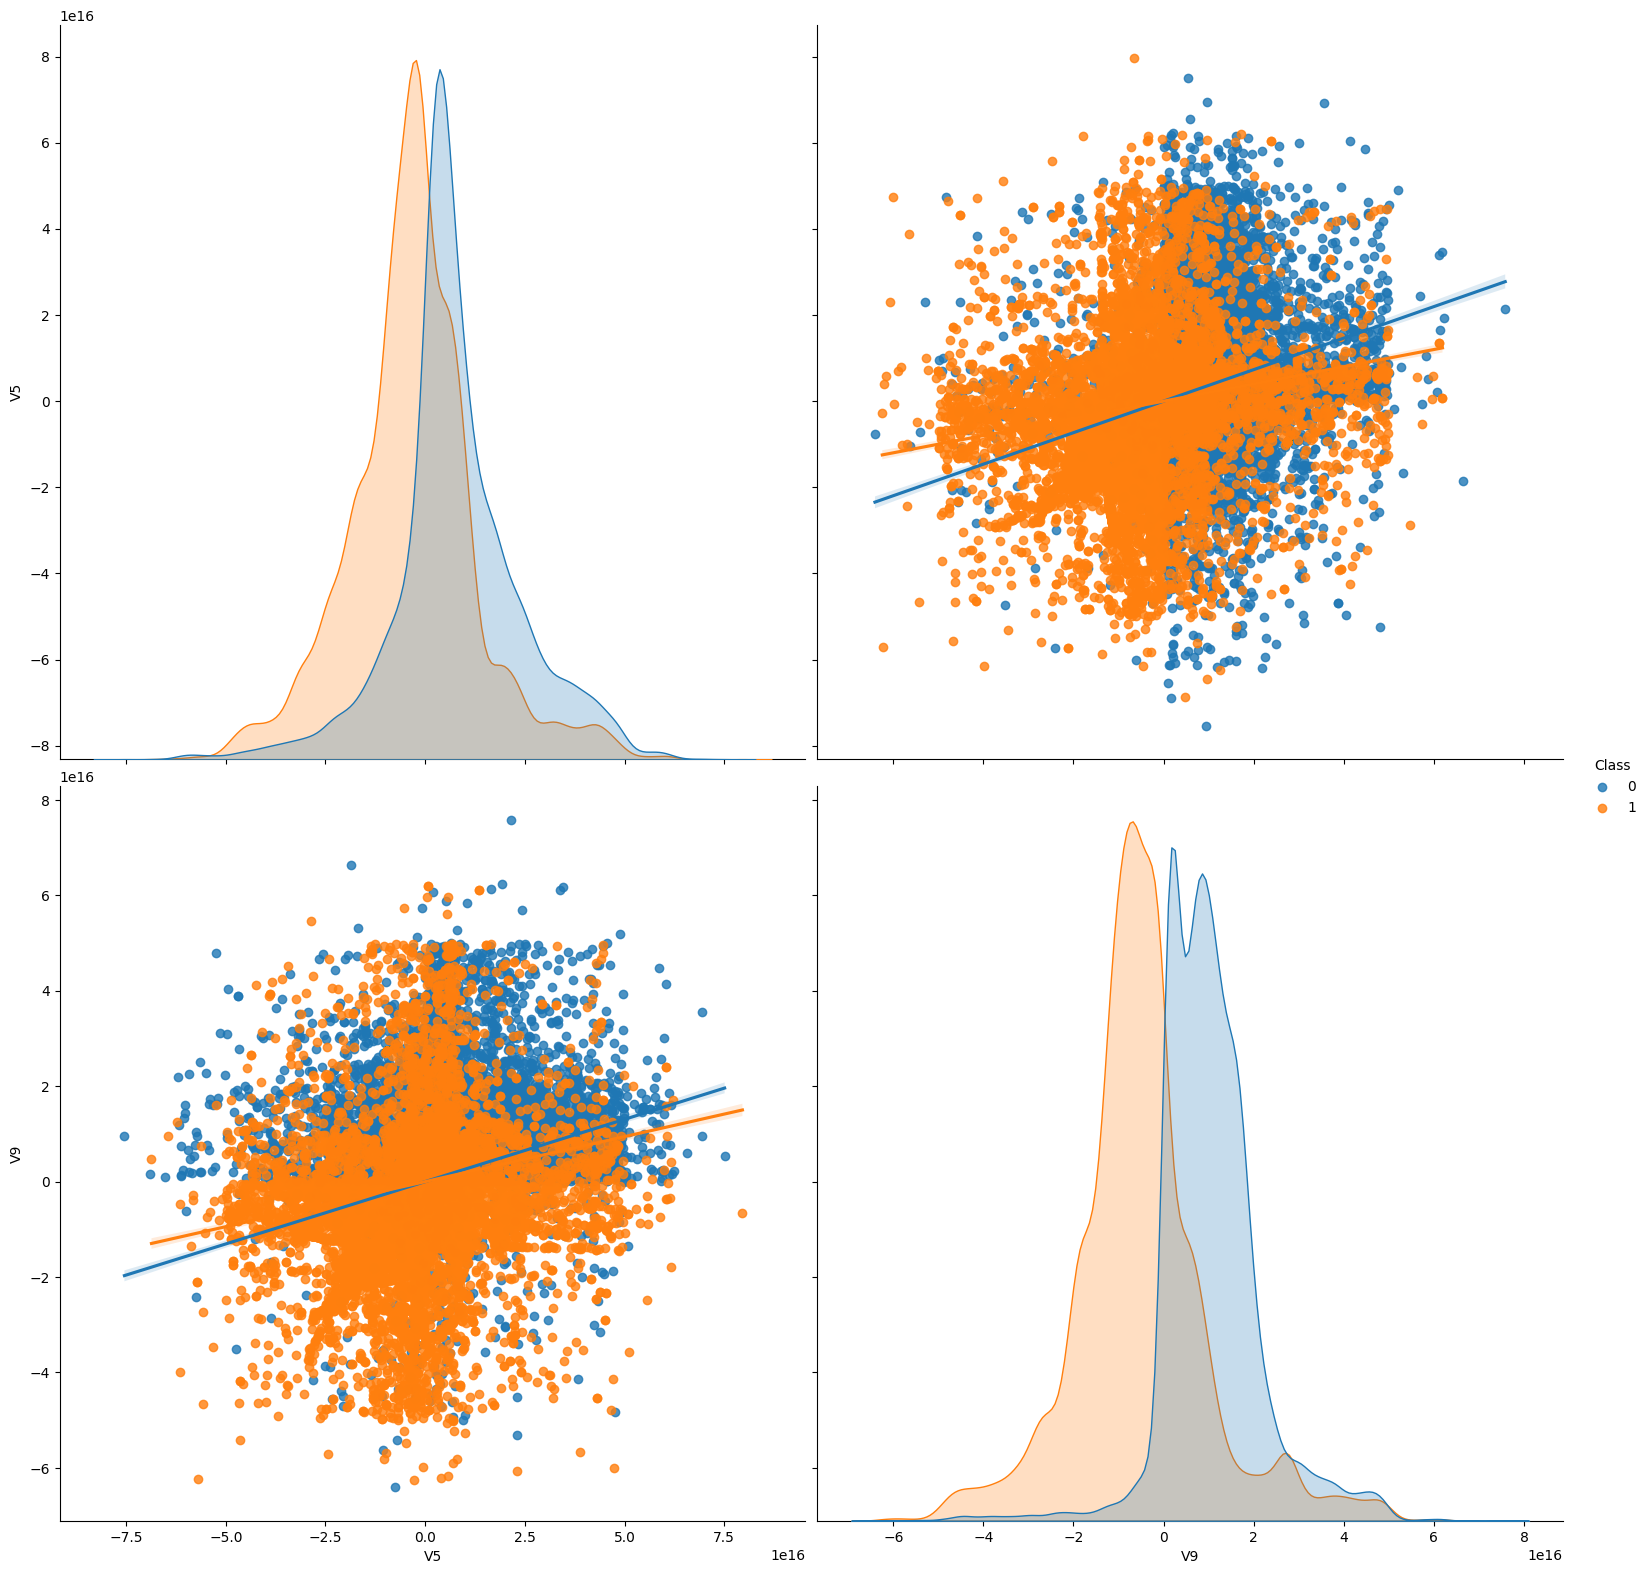

In [ ]:
sb.pairplot(datos2.dropna(), hue='Class',size=8,vars=["V5","V9"],kind='reg')

In [ ]:
X = np.array(datos2.drop(['Class'],1))
y = np.array(datos2['Class'])
X.shape

<ipython-input-42-362653a16234>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(datos2.drop(['Class'],1))


(22406, 2)

In [ ]:
model = linear_model.LogisticRegression(max_iter=1000000, solver='liblinear')
model.fit(X,y)

LogisticRegression(max_iter=1000000, solver='liblinear')

In [ ]:
# Instanciamos el estandarizador (StandardScaler).
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
predictions = model.predict(X)
print(predictions)

[0 0 0 ... 0 0 1]


In [ ]:
validation_size = 0.80
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)

In [ ]:
X_train

array([[-1.09925e+15, -1.60779e+16],
       [-1.12419e+16,  8.56125e+15],
       [ 2.71020e+15,  2.40661e+16],
       ...,
       [ 4.48518e+16,  2.06883e+16],
       [ 1.69560e+16,  1.24199e+15],
       [-2.21114e+16, -9.74315e+13]])

In [ ]:
from sklearn.model_selection import KFold
name='Logistic Regression'
kfold = KFold(n_splits=5)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

Logistic Regression: 0.807190 (0.012818)


In [ ]:
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

0.8029567642956764


[[7277  709]
 [2823 7116]]


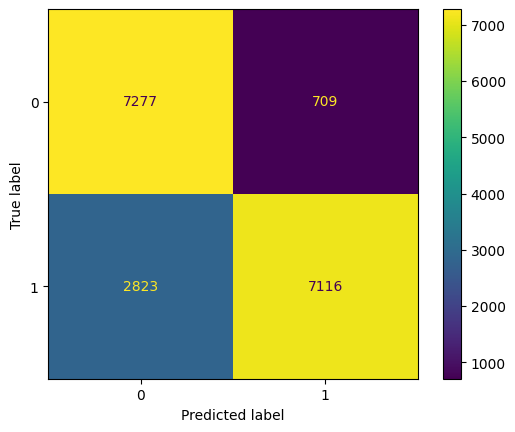

In [ ]:
print(confusion_matrix(Y_validation, predictions))
# grafico matriz de confusión
conf = confusion_matrix(Y_validation, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=conf)
disp.plot(values_format='d')

In [ ]:
# defino variables para metricas
tn, fp, fn, tp = conf.ravel()

# Calcula el False Positive Rate (FPR) y el False Negative Rate (FNR)
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)

#Metricas del modelo
accuracy = accuracy_score(Y_validation, predictions)
recall = recall_score(Y_validation, predictions, average=None)
precision = precision_score(Y_validation, predictions, average=None)
f1 = f1_score(Y_validation, predictions, average=None)
#Imprimimos metricas
print(f"Exactitud : {accuracy}")
print(f"Sensibilidad : {recall}")
print(f"Precisión : {precision}")
print(f"F1 : {f1}")
print("False Positive Rate (FPR):", fpr)
print("False Negative Rate (FNR):", fnr)

Exactitud : 0.8029567642956764
Sensibilidad : [0.91121963 0.7159674 ]
Precisión : [0.72049505 0.90939297]
F1 : [0.80471083 0.80117091]
False Positive Rate (FPR): 0.08878036563986977
False Negative Rate (FNR): 0.2840325988530033


# Todas las variables

In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

In [ ]:
from pandas._libs.tslibs import delta_to_nanoseconds
# Datos
# ==============================================================================
# Cargamos el conjunto de datos desde un archivo CSV.
datos = pd.read_csv('/content/tarjetas.csv', header=0, delimiter=";", decimal=",")

# Eliminar filas con valores nulos
datos.dropna(inplace=True)

#Excluimos de la base las columnas de variables categoricas
datos = datos.drop("id", axis=1)



In [ ]:
print(datos.groupby('Class').size())

Class
0     9961
1    12445
dtype: int64


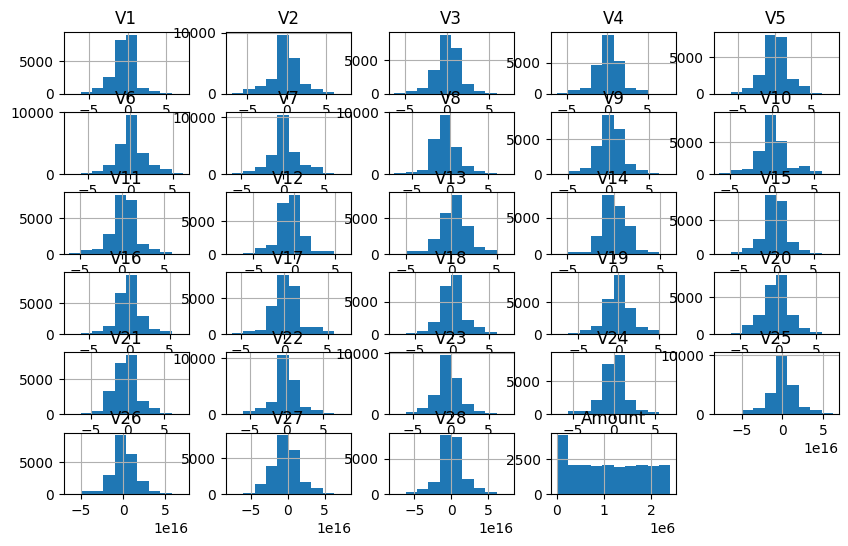

In [ ]:
datos.drop(['Class'], axis=1).hist(figsize=(10, 6))
plt.show()

In [ ]:
X = np.array(datos.drop(['Class'],1))
y = np.array(datos['Class'])
X.shape

<ipython-input-79-daa3b6895620>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(datos.drop(['Class'],1))


(22406, 29)

In [ ]:
model = linear_model.LogisticRegression(max_iter=1000000, solver='liblinear')
model.fit(X,y)

LogisticRegression(max_iter=1000000, solver='liblinear')

In [ ]:
# Instanciamos el estandarizador (StandardScaler).
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
predictions = model.predict(X)
print(predictions)

[0 0 0 ... 1 1 1]


In [ ]:
validation_size = 0.80
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)

In [ ]:
X_train

array([[-7.376200e+15,  1.123400e+16, -1.232630e+16, ...,  1.768960e+16,
         1.779400e+16,  2.665490e+05],
       [ 1.049280e+16, -6.711560e+15,  8.933080e+15, ..., -2.619770e+16,
        -9.129800e+15,  1.129360e+05],
       [-3.549210e+16,  2.770320e+15, -2.206460e+16, ..., -6.960580e+15,
         1.432430e+16,  2.713290e+05],
       ...,
       [-3.184120e+15, -7.741930e+15,  1.140300e+16, ...,  2.923460e+15,
         7.314140e+15,  7.126790e+05],
       [ 8.641530e+14,  1.484090e+16, -4.296110e+15, ..., -4.532200e+16,
        -4.063170e+15,  2.077391e+06],
       [-1.926450e+16,  2.145920e+15, -1.924720e+16, ...,  2.232660e+16,
         1.146450e+16,  1.518442e+06]])

In [ ]:
from sklearn.model_selection import KFold
name='Logistic Regression'
kfold = KFold(n_splits=5)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

Logistic Regression: 0.920329 (0.003993)


In [ ]:
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

0.9258577405857741


[[7783  203]
 [1126 8813]]


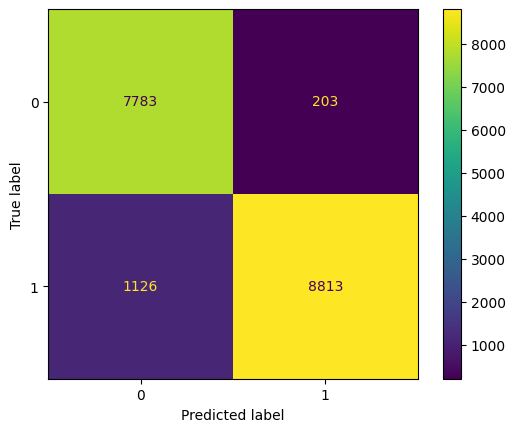

In [ ]:
print(confusion_matrix(Y_validation, predictions))
# grafico matriz de confusión
conf = confusion_matrix(Y_validation, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=conf)
disp.plot(values_format='d')

In [ ]:
# defino variables para metricas
tn, fp, fn, tp = conf.ravel()

# Calcula el False Positive Rate (FPR) y el False Negative Rate (FNR)
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)

#Metricas del modelo
accuracy = accuracy_score(Y_validation, predictions)
recall = recall_score(Y_validation, predictions, average=None)
precision = precision_score(Y_validation, predictions, average=None)
f1 = f1_score(Y_validation, predictions, average=None)
#Imprimimos metricas
print(f"Exactitud : {accuracy}")
print(f"Sensibilidad : {recall}")
print(f"Precisión : {precision}")
print(f"F1 : {f1}")
print("False Positive Rate (FPR):", fpr)
print("False Negative Rate (FNR):", fnr)

Exactitud : 0.9258577405857741
Sensibilidad : [0.97458052 0.88670892]
Precisión : [0.87361096 0.97748447]
F1 : [0.92133767 0.92988657]
False Positive Rate (FPR): 0.02541948409717005
False Negative Rate (FNR): 0.11329107556092162


Comparativa Discriminante lineal:

Exactitud : 0.9308667321253236

Sensibilidad : [0.97329585 0.89690639]

Precisión : [0.8831299  0.97672384]

F1 : [0.92602321 0.93511498]

False Positive Rate (FPR): 0.026704146170063246

False Negative Rate (FNR): 0.10309361189232624

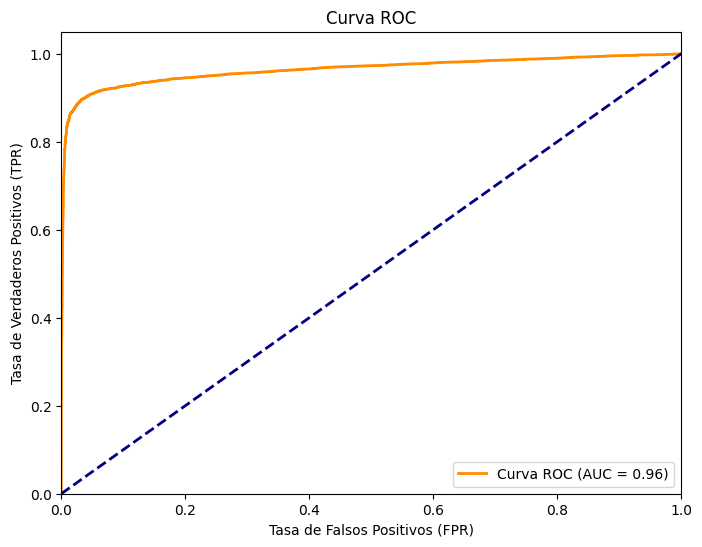

In [ ]:
y_scores = model.predict_proba(X)[:, 1]
fpr, tpr, thresholds = roc_curve(y, y_scores)
roc_auc = roc_auc_score(y, y_scores)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()


La Regresión Logística ha demostrado ser una herramienta adecuada y eficaz para la clasificación en este estudio, proporcionando un equilibrio entre simplicidad, interpretabilidad y rendimiento. Aunque siempre hay espacio para la mejora mediante la exploración de modelos más complejos o la inclusión de más variables predictoras, la Regresión Logística establece una base sólida para el análisis y la predicción en el contexto de los datos de tarjetas de crédito.